## Introduction
Let's write a simple implementation of the k-means algorithm. This is a type of unsupervised learning called clustering. Let's say we have a set of data $D = \lbrace x^{(i)} \rbrace_{i=1}^{n}$ where each $x^{(i)} \in \mathbb{R}^{m}$. The goal is to construct a partition of the data with k total partitions; That is, we want to create a set $\lbrace A_{j} \rbrace_{j=1}^{k}$ such that $\cup_j A_{j} = D$ and $\cap_j A_j = \emptyset$. Without any sort of constraints this is trivial and unhelpful. 

One way to construct a useful partition of $D$ is as follows. Construct a set of k vectors $\lbrace \mu_j\rbrace_{j=1}^{k}$, where each $\mu_{j} \in \mathbb{R}^{m}$. We will call these the centers of the clusters. For each data element $x^{(i)} \in \mathbb{R}^{m}$, assign $x^{(i)}$ to cluster $A_j$ if $\min_{j'}d(x^{(i)},\mu_{j'}) = d(x^{(i)},\mu_{j})$, i.e. $\mu_j$ is the closest cluster center to $x^{(i)}$ according to whatever metric $d$ we are using. For simplicity take $d$ to be the standard Euclidean metric. We choose the ${\mu_j}$ by demanding that the sum of the (square) distance of each data point from its cluster center is minimized:

\begin{equation}
\lbrace \mu_1, \dots , \mu_k \rbrace = \arg \min \sum_{j} \sum_{x \in A_j} || x - \mu_{j} ||^2
\end{equation}

It turns out that this is a difficult problem to solve. The most well known algorithm, called k-means or Lloyd's algorithm, is more of a heuristic than a systematic solution. Let's go over how it works.

## The Algorithm
The first step is to start off with an inital guess for the cluster centers: $\mu = \lbrace \mu_j \rbrace$. Next populate the clusters: $\forall i$, $x^{(i)} \in A_j$ if $\arg \min_{j'} d(x^{(i)}, \mu_{j'} ) = d(x^{(i)}, \mu_j)$. Now construct a new set of cluster centers as follows:
\begin{gather}
\mu' = \lbrace \mu_1 ' ,\dots , \mu_k '  \rbrace, \\
\mu_i ' = \frac{1}{|A_i|} \sum_{x \in A_i}x
\end{gather}
Here $|A_i|$ is the cardinatity of the set $A_i$, or the number of points within $A_i$. Now update $\mu \leftarrow \mu'$. Repeat until convergence is achieved in $\mu$.

## Discussion
There are two major problems I want to understand: how do we choose the inital cluster centers? And how do we choose k? For now, I don't know the best way to choose the cluster centers. As for k, note that we could simply choose $k = n$ and center each cluster at the position of a data point. So, $k$ should be chosen to be less than $n$. If there is an a priori best choice of $k$, then one should choose that.

## This Notebook
I got the data for this notebook from https://github.com/j2kun/k-means . The columns birth and death correspond to (crudely) the birth and death rates (per 1,000 people) for the year 2012 for several different countries. 

In [12]:
#Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [141]:
data = pd.read_csv("birth_death.csv", sep="\t", index_col = 0)

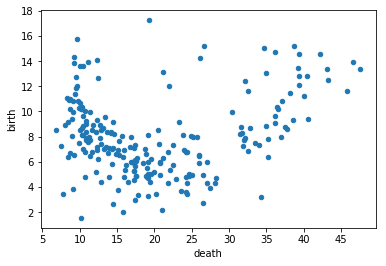

In [142]:
data.plot("death","birth",kind ='scatter')
plt.show()

Let's standardize each column, replacing each value with its z-score: $x_j \mapsto (x_j - \mu_j)/\sigma_j $, where $j$ stands for either 'birth' or 'death'.

In [143]:
birth_mean = np.mean(data['birth'].values)
birth_std = np.std(data['birth'].values)

death_mean = np.mean(data['death'].values)
death_std = np.std(data['death'].values)

data["birth_normalized"] = data["birth"].map(lambda x:  (x-birth_mean)/birth_std )
data["death_normalized"] = data["death"].map(lambda x: (x-death_mean)/death_std )

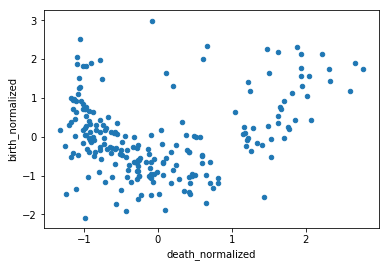

In [145]:
data.plot("death_normalized","birth_normalized",kind ='scatter')
plt.show()

In [476]:
#Extract the data vectors and store them as numpy arrays
data_vectors = []
for index in data.index:
    data_vectors.append(np.array([data["death_normalized"][index], data["birth_normalized"][index]] ))

## Implement k-means

In [477]:
#Define some helper functions
#Generate k different vectors for our cluster centers.
def initialize_clusters_centers(dv_length, k):
    cluster_centers = []
    for _ in range(k):
        cluster_centers.append(np.random.randn(dv_length) )
    return cluster_centers


# Populate the clusters
def get_clusters(data_vectors, cluster_centers, k):
    clusters = []
    for _ in range(k):
        clusters.append([])
    for x in data_vectors:
        x_index = 0
        for j in range(len(cluster_centers)):
            if j ==0:
                distance_min = np.linalg.norm(x - cluster_centers[j]) 
            elif np.linalg.norm(x - cluster_centers[j])  < distance_min:
                distance_min = np.linalg.norm(x - cluster_centers[j]) 
                x_index = j
            else:
                pass
        clusters[x_index].append(x)
    return clusters

def update_centers(clusters, dv_length):
    new_centers = []
    for cluster in clusters:
        new_mean = np.zeros( dv_length )
        for x in cluster:
            new_mean += 1/len(cluster) * x
        new_centers.append(new_mean)
    return new_centers
        
        
    

In [523]:
def k_means(data_vectors, k ):
    dv_length = len(data_vectors[0])
    old_centers = initialize_clusters_centers(dv_length, k)
    converge = False
    while not converge:
        clusters = get_clusters(data_vectors, old_centers, k)
        new_centers = update_centers(clusters, dv_length)
        if np.array_equal(np.array(new_centers), np.array(old_centers)):
            converge = True
        old_centers = new_centers
    return new_centers, clusters
        

# Use k-means on the data

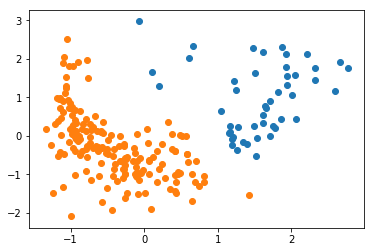

In [539]:
k = 2
centers, clusters = k_means(data_vectors, k)

for l in range(k):
    cluster = clusters[l]
    num_points = len(cluster)
    plt.scatter( [cluster[j][0] for j in range(num_points) ], [cluster[j][1] for j in range(num_points) ] )
plt.show()

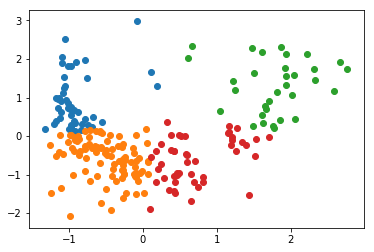

In [538]:
k = 4
centers, clusters = k_means(data_vectors, k)

for l in range(k):
    cluster = clusters[l]
    num_points = len(cluster)
    plt.scatter( [cluster[j][0] for j in range(num_points) ], [cluster[j][1] for j in range(num_points) ] )
plt.show()